# 1. Introduction

## 1.1. Project Overview

In this project, I aim to build a classification model to predict customer churn for SyriaTel, a telecommunications company. Customer churn, or the loss of customers to competitors or other factors, represents a significant challenge for businesses in the telecom industry. By predicting which customers are likely to leave SyriaTel, the company can implement targeted retention strategies to reduce churn and improve customer loyalty.


## 1.2. Dataset Choice

For this project, I will use the **SyriaTel Customer Churn** dataset. This dataset provides information about SyriaTel's customers and their interactions with the company. It includes various features that can be used to predict whether a customer will stop doing business with SyriaTel.

You can access the dataset [here](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset?resource=download).


### Why This Dataset?

- **Relevance**: The dataset is directly related to the business problem of customer churn, making it highly relevant for our classification task.
- **Binary Classification**: The problem is a binary classification problem, where we need to predict whether a customer will churn (yes) or not (no). This simplifies the modeling and evaluation process.
- **Business Impact**: Reducing customer churn can have a substantial positive impact on SyriaTel's revenue and customer retention efforts.

By analyzing this dataset, I aim to provide actionable insights that can help SyriaTel minimize churn and enhance customer satisfaction.


# 2. Business Understanding

## 2.1. Overview

The telecommunications industry is highly competitive, with companies constantly striving to retain their customers while acquiring new ones. Customer churn, the phenomenon where customers stop doing business with a company, poses a significant challenge. Reducing churn is critical because acquiring new customers often costs more than retaining existing ones.


## 2.2. Problem Statement

SyriaTel, a leading telecommunications company, is facing challenges with customer retention. The company has observed a decline in customer loyalty, leading to increased churn rates. The business needs to identify customers who are likely to churn in order to take proactive measures to retain them.


## 2.3. Objective

The primary objective of this project is to build a machine learning model that can accurately predict whether a SyriaTel customer will churn. By identifying the key factors that contribute to customer churn, the company can implement targeted retention strategies to minimize churn rates and improve customer satisfaction.


## 2.4. Stakeholders

The key stakeholders for this project include:
- **Marketing Team:** Interested in identifying at-risk customers for targeted retention campaigns.
- **Customer Service Team:** Aiming to improve customer satisfaction and reduce churn through personalized service.
- **Business Analysts:** Focused on understanding churn patterns and their impact on the company’s revenue.
- **Executive Team:** Concerned with overall business performance and customer retention strategies.


# 3. Data Understanding

## 3.1. Overview

In this section, I will explore the dataset provided by SyriaTel. Understanding the structure and characteristics of the data is crucial before moving forward with the analysis. I will look into the data types, the presence of missing values, and the distribution of features.


## 3.2. Data Collection

The dataset used in this project was obtained from a curated collection of customer churn datasets. It includes a wide range of features that capture customer behavior, account information, and service usage patterns. This data will be the foundation for building our predictive model.


### Load the Dataset

In [1]:
# Load necessary libraries
import pandas as pd

# Load the dataset
data_path = "bigml_59c28831336c6604c800002a.csv"
df = pd.read_csv(data_path)

# Display the first few rows of the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## 3.3. Data Description
The dataset contains 3,333 rows and 21 columns, representing customer information for SyriaTel, a telecommunications company. Key attributes include:

- **State**: Customer's U.S. state of residence.
- **Account length**: Duration of customer’s relationship with SyriaTel.
- **Area code**: Area code of the customer’s phone number.
- **Phone number**: Customer’s phone number.
- **International plan**: Subscription to an international calling plan (yes or no).
- **Voice mail plan**: Subscription to a voice mail plan (yes or no).
- **Usage and charges**: Includes total minutes, calls, and charges for day, evening, night, and international periods.
- **Customer service calls**: Number of calls made to customer service.
- **Churn**: Whether the customer churned (True) or not (False).

This dataset will be used to identify patterns and predict customer churn.

### Data Insights and Summary Statistics

To further understand the dataset, we will explore the summary statistics and overall data structure:

In [3]:
# Display summary statistics of the dataset
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [4]:
# Display data types and non-null counts for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Unique Values and Data Types

I will now examine the unique values and data types of each column in the dataset. This analysis helps us understand the structure of the data, identify categorical vs. numerical variables, and detect any anomalies or data inconsistencies.

In [6]:
# Displaying unique values and data types of each column
for column in df.columns:
    print(f"{column}:")
    print(f" - Data Type: {df[column].dtype}")
    print(f" - Number of Unique Values: {df[column].nunique()}")
    print(f" - Unique Values: {df[column].unique()[:5]}...")  # Limiting to the first 5 unique values for brevity
    print("\n")


state:
 - Data Type: object
 - Number of Unique Values: 51
 - Unique Values: ['KS' 'OH' 'NJ' 'OK' 'AL']...


account length:
 - Data Type: int64
 - Number of Unique Values: 212
 - Unique Values: [128 107 137  84  75]...


area code:
 - Data Type: int64
 - Number of Unique Values: 3
 - Unique Values: [415 408 510]...


phone number:
 - Data Type: object
 - Number of Unique Values: 3333
 - Unique Values: ['382-4657' '371-7191' '358-1921' '375-9999' '330-6626']...


international plan:
 - Data Type: object
 - Number of Unique Values: 2
 - Unique Values: ['no' 'yes']...


voice mail plan:
 - Data Type: object
 - Number of Unique Values: 2
 - Unique Values: ['yes' 'no']...


number vmail messages:
 - Data Type: int64
 - Number of Unique Values: 46
 - Unique Values: [25 26  0 24 37]...


total day minutes:
 - Data Type: float64
 - Number of Unique Values: 1667
 - Unique Values: [265.1 161.6 243.4 299.4 166.7]...


total day calls:
 - Data Type: int64
 - Number of Unique Values: 119
 - Unique

### Analyze Distributions of Numerical Features

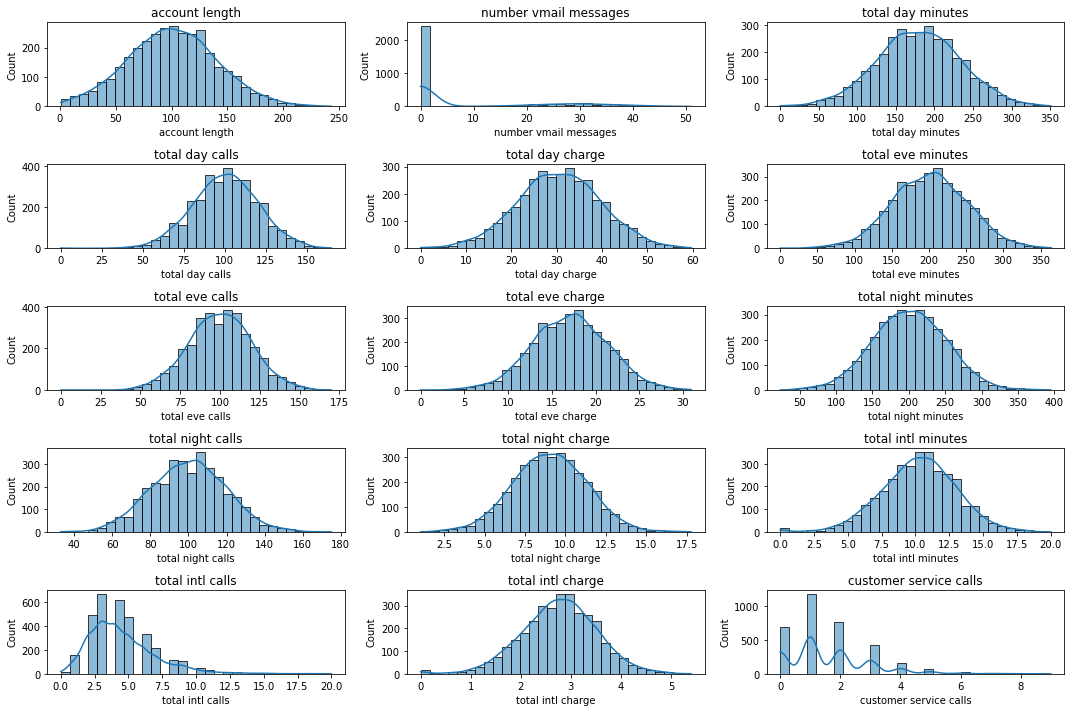

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions of numerical features
numerical_features = ['account length', 'number vmail messages', 'total day minutes', 
                      'total day calls', 'total day charge', 'total eve minutes', 
                      'total eve calls', 'total eve charge', 'total night minutes', 
                      'total night calls', 'total night charge', 'total intl minutes', 
                      'total intl calls', 'total intl charge', 'customer service calls']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(5, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(feature)
plt.tight_layout()
plt.show()

### Analyze Distributions of Categorical Features

C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

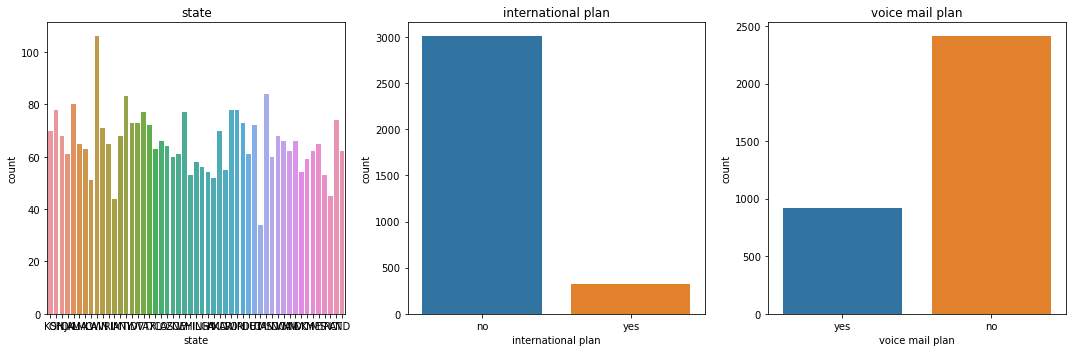

In [10]:
# Plot distributions of categorical features
categorical_features = ['state', 'international plan', 'voice mail plan']

plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()